## HR Analytics with Decision Tree *Classifier*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/DA/DecisionTreeClass/

/content/gdrive/MyDrive/DA/DecisionTreeClass


In [ ]:
%ls

data_dictionary.xlsx      general_data.csv  manager_survey_data.csv
employee_survey_data.csv  in_time.csv       out_time.csv


In [ ]:
#We will be using 5 datasets in this project
general_data = pd.read_csv("general_data.csv")

#survey data
manager_survey_data = pd.read_csv("manager_survey_data.csv")
employee_survey_data = pd.read_csv("employee_survey_data.csv")

#office entry/exit-time

in_time = pd.read_csv("in_time.csv")
out_time = pd.read_csv("out_time.csv")

#data dictionary

data_dictionary = pd.read_excel("data_dictionary.xlsx")

In [ ]:
data_dictionary

,Variable,Meaning,Levels
0,Age,Age of the employee,NaN
1,Attrition,Whether the employee left in the previous year...,NaN
2,BusinessTravel,How frequently the employees travelled for bus...,NaN
3,Department,Department in company,NaN
4,DistanceFromHome,Distance from home in kms,NaN
5,Education,Education Level,1 'Below College'
6,NaN,NaN,2 'College'
7,NaN,NaN,3 'Bachelor'
8,NaN,NaN,4 'Master'
9,NaN,NaN,5 'Doctor'


In [ ]:
data_dictionary.replace(np.nan," ")

,Variable,Meaning,Levels
0,Age,Age of the employee,
1,Attrition,Whether the employee left in the previous year...,
2,BusinessTravel,How frequently the employees travelled for bus...,
3,Department,Department in company,
4,DistanceFromHome,Distance from home in kms,
5,Education,Education Level,1 'Below College'
6,,,2 'College'
7,,,3 'Bachelor'
8,,,4 'Master'
9,,,5 'Doctor'


In [ ]:
data_dictionary['Meaning'][1]

'Whether the employee left in the previous year or not'

In [ ]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
general_data['EmployeeID']

0          1
1          2
2          3
3          4
4          5
        ... 
4405    4406
4406    4407
4407    4408
4408    4409
4409    4410
Name: EmployeeID, Length: 4410, dtype: int64

In [ ]:
general_data.columns.value_counts()

Age                        1
Attrition                  1
YearsSinceLastPromotion    1
YearsAtCompany             1
TrainingTimesLastYear      1
TotalWorkingYears          1
StockOptionLevel           1
StandardHours              1
PercentSalaryHike          1
Over18                     1
NumCompaniesWorked         1
MonthlyIncome              1
MaritalStatus              1
JobRole                    1
JobLevel                   1
Gender                     1
EmployeeID                 1
EmployeeCount              1
EducationField             1
Education                  1
DistanceFromHome           1
Department                 1
BusinessTravel             1
YearsWithCurrManager       1
dtype: int64

In [ ]:
general_data.columns.value_counts().sum() #so we have 42 columns in total.

24

In [ ]:
manager_survey_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [ ]:
employee_survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [ ]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [ ]:
in_time.head().columns.value_counts().sum()

262

In [ ]:
out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [ ]:
out_time.head().columns.value_counts().sum()

262

In [ ]:
in_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [ ]:
in_time.fillna(0,inplace=True)
out_time.fillna(0,inplace=True)

In [ ]:
# Convert all columns(except unnamed:0 which is employee id)to datetime format using pandas.to_datetime
in_time.iloc[:,1:] = in_time.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')

<ipython-input-114-17e8bca5d6f6>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  in_time.iloc[:,1:] = in_time.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')


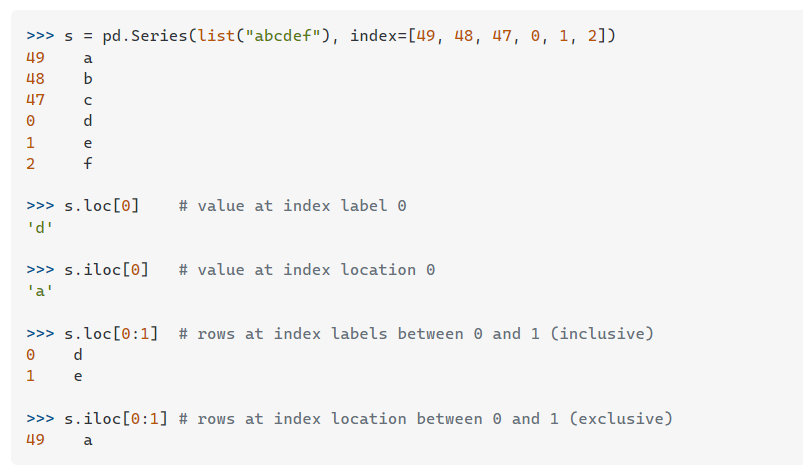

In [ ]:
out_time.iloc[:,1:] = out_time.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')

<ipython-input-115-da0b54ca60b4>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  out_time.iloc[:,1:] = out_time.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')


In [ ]:
#join in_time and out_time in a single df total_time
total_time = in_time.append(out_time)

<ipython-input-116-afbeba99fa17>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_time = in_time.append(out_time)


In [ ]:
len(total_time)

8820

In [ ]:
total_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,1970-01-01,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,1970-01-01 00:00:00,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,1970-01-01,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,1970-01-01,2015-01-02 10:15:44,2015-01-05 10:21:05,1970-01-01 00:00:00,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,1970-01-01 00:00:00,1970-01-01,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,1970-01-01,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,1970-01-01,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,1970-01-01,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,1970-01-01,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,1970-01-01,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,1970-01-01,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,1970-01-01,2015-01-02 17:27:37,2015-01-05 19:08:20,2015-01-06 18:50:49,2015-01-07 18:57:40,2015-01-08 17:58:31,2015-01-09 18:06:15,2015-01-12 17:58:48,2015-01-13 18:10:35,...,2015-12-18 18:06:05,2015-12-21 18:35:06,2015-12-22 18:33:44,2015-12-23 18:40:56,2015-12-24 18:21:29,1970-01-01,2015-12-28 18:44:35,2015-12-29 19:14:38,2015-12-30 18:24:56,2015-12-31 18:30:41
4406,4407,1970-01-01,2015-01-02 16:19:01,1970-01-01 00:00:00,2015-01-06 15:07:37,2015-01-07 15:25:50,2015-01-08 16:12:33,2015-01-09 15:26:56,2015-01-12 16:10:42,2015-01-13 16:22:43,...,2015-12-18 15:23:02,2015-12-21 15:31:14,2015-12-22 15:45:59,2015-12-23 16:38:59,2015-12-24 15:47:15,1970-01-01,2015-12-28 15:34:34,2015-12-29 16:47:02,2015-12-30 16:03:17,2015-12-31 16:18:39
4407,4408,1970-01-01,2015-01-02 17:17:35,2015-01-05 17:08:07,2015-01-06 17:27:46,2015-01-07 18:27:22,2015-01-08 17:05:25,2015-01-09 17:02:57,2015-01-12 17:35:45,2015-01-13 17:15:52,...,2015-12-18 17:48:05,2015-12-21 17:43:05,2015-12-22 17:47:23,2015-12-23 17:43:37,2015-12-24 17:20:12,1970-01-01,2015-12-28 17:43:28,1970-01-01 00:00:00,2015-12-30 17:48:14,2015-12-31 18:08:55
4408,4409,1970-01-01,2015-01-02 19:48:37,2015-01-05 19:37:40,2015-01-06 20:00:08,2015-01-07 19:35:59,2015-01-08 18:55:13,1970-01-01 00:00:00,2015-01-12 19:18:17,2015-01-13 19:24:02,...,2015-12-18 19:52:44,2015-12-21 19:21:35,2015-12-22 19:32:40,2015-12-23 18:57:00,2015-12-24 19:37:57,1970-01-01,2015-12-28 19:58:36,2015-12-29 18:55:26,2015-12-30 19:37:22,2015-12-31 19:33:45


In [ ]:
# Find out the difference between the out_time and in_time
# pandas df have diff(periods=1,axis=0)
total_time = total_time.diff(periods=4410)

In [ ]:
total_time = total_time.iloc[4410:]

In [ ]:
total_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0.0,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,...,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,0.0,0 days,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,0.0,0 days,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
3,0.0,0 days,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
4,0.0,0 days,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0.0,0 days,0 days 08:07:05,0 days 08:50:27,0 days 08:23:58,0 days 08:50:42,0 days 08:13:25,0 days 08:16:51,0 days 08:21:38,0 days 08:45:33,...,0 days 08:04:59,0 days 08:09:41,0 days 08:17:33,0 days 08:36:16,0 days 08:35:49,0 days,0 days 08:28:56,0 days 09:04:29,0 days 08:56:37,0 days 08:30:29
4406,0.0,0 days,0 days 06:15:20,0 days 00:00:00,0 days 05:23:37,0 days 05:43:40,0 days 06:11:36,0 days 05:42:52,0 days 06:03:10,0 days 06:17:32,...,0 days 05:55:30,0 days 05:49:50,0 days 05:55:29,0 days 06:06:38,0 days 05:59:34,0 days,0 days 05:40:11,0 days 06:33:30,0 days 05:42:08,0 days 06:08:51
4407,0.0,0 days,0 days 07:16:34,0 days 07:35:07,0 days 07:38:29,0 days 07:59:10,0 days 07:17:47,0 days 07:01:54,0 days 07:46:33,0 days 07:28:42,...,0 days 07:47:08,0 days 07:51:58,0 days 07:45:13,0 days 07:45:08,0 days 07:24:07,0 days,0 days 07:44:04,0 days 00:00:00,0 days 07:45:38,0 days 08:05:25
4408,0.0,0 days,0 days 09:31:32,0 days 09:35:13,0 days 09:47:18,0 days 09:23:28,0 days 09:12:16,0 days 00:00:00,0 days 09:17:39,0 days 09:35:59,...,0 days 09:58:11,0 days 09:20:27,0 days 09:22:21,0 days 09:14:30,0 days 09:41:52,0 days,0 days 10:03:11,0 days 09:00:44,0 days 09:21:38,0 days 09:36:58


In [ ]:
total_time.reset_index(inplace=True)
total_time.head()

<ipython-input-122-755a5ca9946a>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  total_time.reset_index(inplace=True)


,index,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0,0.0,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,...,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,1,0.0,0 days,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,2,0.0,0 days,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
3,3,0.0,0 days,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
4,4,0.0,0 days,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05


In [ ]:
# few columns have 0 value. It means that office was closed on that particular day.
## remove these columns to calculate mean time(remember that index is employee id, so later we need to add it again)
total_time.drop(columns=['index', 'Unnamed: 0'], axis=1, inplace=True)

In [ ]:
total_time.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days,...,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,0 days,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,0 days,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
3,0 days,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
4,0 days,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05


In [ ]:
# removing all 0 columns which represent holidays.
total_act = total_time.copy()

In [ ]:
total_act!="0 days" #it says what all values in the columns have 0 days as false, it shows false cuz we need it to be deleted that's why !=

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,False,True,True,True,True,True,True,True,True,False,...,False,True,True,True,True,False,True,True,True,True
1,False,True,True,False,True,True,True,True,True,False,...,True,True,True,True,False,False,True,True,True,True
2,False,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,False,True,True,True,True
3,False,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,False,True,True,True,True
4,False,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,False,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,False,True,True,True,True
4406,False,True,False,True,True,True,True,True,True,False,...,True,True,True,True,True,False,True,True,True,True
4407,False,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,False,True,False,True,True
4408,False,True,True,True,True,True,False,True,True,False,...,True,True,True,True,True,False,True,True,True,True


In [ ]:
(total_act!="0 days").any(axis=0) #returns a boolean Series indicating which columns have nonzero entries.

2015-01-01    False
2015-01-02     True
2015-01-05     True
2015-01-06     True
2015-01-07     True
              ...  
2015-12-25    False
2015-12-28     True
2015-12-29     True
2015-12-30     True
2015-12-31     True
Length: 261, dtype: bool

In [ ]:
total_act = total_act.loc[:, (total_act!="0 days").any(axis=0)] # we use df.loc to select those columns that do not have false values.

In [ ]:
total_time = total_act

In [ ]:
total_time

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,...,0 days 00:00:00,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,0 days 07:43:39,...,0 days 07:55:42,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,0 days 07:12:37,...,0 days 07:13:06,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
3,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,0 days 06:54:28,...,0 days 07:27:21,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
4,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,0 days 08:24:13,...,0 days 08:19:12,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0 days 08:07:05,0 days 08:50:27,0 days 08:23:58,0 days 08:50:42,0 days 08:13:25,0 days 08:16:51,0 days 08:21:38,0 days 08:45:33,0 days 08:21:20,0 days 09:00:27,...,0 days 08:30:17,0 days 08:04:59,0 days 08:09:41,0 days 08:17:33,0 days 08:36:16,0 days 08:35:49,0 days 08:28:56,0 days 09:04:29,0 days 08:56:37,0 days 08:30:29
4406,0 days 06:15:20,0 days 00:00:00,0 days 05:23:37,0 days 05:43:40,0 days 06:11:36,0 days 05:42:52,0 days 06:03:10,0 days 06:17:32,0 days 06:00:49,0 days 05:35:33,...,0 days 05:59:01,0 days 05:55:30,0 days 05:49:50,0 days 05:55:29,0 days 06:06:38,0 days 05:59:34,0 days 05:40:11,0 days 06:33:30,0 days 05:42:08,0 days 06:08:51
4407,0 days 07:16:34,0 days 07:35:07,0 days 07:38:29,0 days 07:59:10,0 days 07:17:47,0 days 07:01:54,0 days 07:46:33,0 days 07:28:42,0 days 08:07:22,0 days 07:41:57,...,0 days 07:41:07,0 days 07:47:08,0 days 07:51:58,0 days 07:45:13,0 days 07:45:08,0 days 07:24:07,0 days 07:44:04,0 days 00:00:00,0 days 07:45:38,0 days 08:05:25
4408,0 days 09:31:32,0 days 09:35:13,0 days 09:47:18,0 days 09:23:28,0 days 09:12:16,0 days 00:00:00,0 days 09:17:39,0 days 09:35:59,0 days 09:29:04,0 days 09:20:21,...,0 days 09:15:18,0 days 09:58:11,0 days 09:20:27,0 days 09:22:21,0 days 09:14:30,0 days 09:41:52,0 days 10:03:11,0 days 09:00:44,0 days 09:21:38,0 days 09:36:58


In [ ]:
total_time.iloc[0,0]

Timedelta('0 days 07:12:30')

We can compute the total hours by converting this to string and splitting it by "", then by again splitting it by '' we will get hours, minutes and seconds. Add hours,minutes/60 and seconds/3600 to get total hours.

In [ ]:
total_time['mean_time'] = total_time.mean(axis=1)

In [ ]:
total_time

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,...,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49,0 days 06:52:12.823293172
1,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,0 days 07:43:39,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38,0 days 07:18:57.493975903
2,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,0 days 07:12:37,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11,0 days 06:48:57.891566265
3,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,0 days 06:54:28,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59,0 days 06:47:21.172690763
4,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,0 days 08:24:13,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05,0 days 07:52:39.220883534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0 days 08:07:05,0 days 08:50:27,0 days 08:23:58,0 days 08:50:42,0 days 08:13:25,0 days 08:16:51,0 days 08:21:38,0 days 08:45:33,0 days 08:21:20,0 days 09:00:27,...,0 days 08:04:59,0 days 08:09:41,0 days 08:17:33,0 days 08:36:16,0 days 08:35:49,0 days 08:28:56,0 days 09:04:29,0 days 08:56:37,0 days 08:30:29,0 days 08:19:00.915662650
4406,0 days 06:15:20,0 days 00:00:00,0 days 05:23:37,0 days 05:43:40,0 days 06:11:36,0 days 05:42:52,0 days 06:03:10,0 days 06:17:32,0 days 06:00:49,0 days 05:35:33,...,0 days 05:55:30,0 days 05:49:50,0 days 05:55:29,0 days 06:06:38,0 days 05:59:34,0 days 05:40:11,0 days 06:33:30,0 days 05:42:08,0 days 06:08:51,0 days 05:53:49.907630522
4407,0 days 07:16:34,0 days 07:35:07,0 days 07:38:29,0 days 07:59:10,0 days 07:17:47,0 days 07:01:54,0 days 07:46:33,0 days 07:28:42,0 days 08:07:22,0 days 07:41:57,...,0 days 07:47:08,0 days 07:51:58,0 days 07:45:13,0 days 07:45:08,0 days 07:24:07,0 days 07:44:04,0 days 00:00:00,0 days 07:45:38,0 days 08:05:25,0 days 07:08:58.293172690
4408,0 days 09:31:32,0 days 09:35:13,0 days 09:47:18,0 days 09:23:28,0 days 09:12:16,0 days 00:00:00,0 days 09:17:39,0 days 09:35:59,0 days 09:29:04,0 days 09:20:21,...,0 days 09:58:11,0 days 09:20:27,0 days 09:22:21,0 days 09:14:30,0 days 09:41:52,0 days 10:03:11,0 days 09:00:44,0 days 09:21:38,0 days 09:36:58,0 days 09:11:15.401606425


In [ ]:
total_time.iloc[0,0] # 0 is 0th index, days is 1st index, 7:12:30 is 2nd index. SO WE NEED THE 2ND INDEX

Timedelta('0 days 07:12:30')

In [ ]:
total_time['mean_time'] = total_time['mean_time'].apply(lambda x: int(str(x).split(' ')[2].split(':')[0]) + int(str(x).split(' ')[2].split(':')[1])/60 + float(str(x).split(' ')[2].split(':')[2])/3600 )

In [ ]:
total_time.reset_index(inplace=True)

In [ ]:
total_time

,index,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time
0,0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,...,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49,6.870229
1,1,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38,7.315971
2,2,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11,6.816081
3,3,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59,6.789215
4,4,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05,7.877561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4405,0 days 08:07:05,0 days 08:50:27,0 days 08:23:58,0 days 08:50:42,0 days 08:13:25,0 days 08:16:51,0 days 08:21:38,0 days 08:45:33,0 days 08:21:20,...,0 days 08:04:59,0 days 08:09:41,0 days 08:17:33,0 days 08:36:16,0 days 08:35:49,0 days 08:28:56,0 days 09:04:29,0 days 08:56:37,0 days 08:30:29,8.316921
4406,4406,0 days 06:15:20,0 days 00:00:00,0 days 05:23:37,0 days 05:43:40,0 days 06:11:36,0 days 05:42:52,0 days 06:03:10,0 days 06:17:32,0 days 06:00:49,...,0 days 05:55:30,0 days 05:49:50,0 days 05:55:29,0 days 06:06:38,0 days 05:59:34,0 days 05:40:11,0 days 06:33:30,0 days 05:42:08,0 days 06:08:51,5.897197
4407,4407,0 days 07:16:34,0 days 07:35:07,0 days 07:38:29,0 days 07:59:10,0 days 07:17:47,0 days 07:01:54,0 days 07:46:33,0 days 07:28:42,0 days 08:07:22,...,0 days 07:47:08,0 days 07:51:58,0 days 07:45:13,0 days 07:45:08,0 days 07:24:07,0 days 07:44:04,0 days 00:00:00,0 days 07:45:38,0 days 08:05:25,7.149526
4408,4408,0 days 09:31:32,0 days 09:35:13,0 days 09:47:18,0 days 09:23:28,0 days 09:12:16,0 days 00:00:00,0 days 09:17:39,0 days 09:35:59,0 days 09:29:04,...,0 days 09:58:11,0 days 09:20:27,0 days 09:22:21,0 days 09:14:30,0 days 09:41:52,0 days 10:03:11,0 days 09:00:44,0 days 09:21:38,0 days 09:36:58,9.187612


In [ ]:
total_time['index'] = total_time['index'].apply(lambda x: int(x+1))

In [ ]:
total_time.head()

,index,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time
0,1,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,...,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49,6.870229
1,2,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38,7.315971
2,3,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11,6.816081
3,4,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59,6.789215
4,5,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05,7.877561


In [ ]:
total_time = total_time.rename(columns={'index':'EmployeeID'})

In [ ]:
# we only want id and mean time
total_time = total_time[['EmployeeID','mean_time']]

In [ ]:
df = pd.merge(general_data,manager_survey_data, on='EmployeeID',how='inner')
df = pd.merge(df,employee_survey_data,on='EmployeeID',how='inner')
df = pd.merge(df,total_time,on='EmployeeID',how='inner')

In [ ]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3,3,3.0,4.0,2.0,6.870229
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,2,4,3.0,2.0,4.0,7.315971
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,3,3,2.0,2.0,1.0,6.816081
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,2,3,4.0,4.0,3.0,6.789215
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,3,3,4.0,1.0,3.0,7.877561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,5,3,0,2,3,3,4.0,1.0,3.0,8.316921
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2,3,0,2,2,3,4.0,4.0,3.0,5.897197
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,4,4,1,2,3,4,1.0,3.0,3.0,7.149526
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,2,9,7,8,2,3,4.0,1.0,3.0,9.187612


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,...,2.799320,7.008163,2.187755,4.123129,2.729932,3.153741,2.723603,2.728246,2.761436,7.314363
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,...,1.288978,6.125135,3.221699,3.567327,0.711400,0.360742,1.092756,1.101253,0.706245,1.330769
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,5.416880
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,...,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,6.279408
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,...,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.011174
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,...,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000,7.900785
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,10.937261


We will remove the columns that have 0 standard deviation

In [ ]:
obj_cols = df.select_dtypes(include=['object']).columns

In [ ]:
obj_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18'],
      dtype='object')

In [ ]:
#How do we find if the standard deviation is 0 in columns that have object datatype like names or etc. If all the data in the column is same
#then we can conclude that std deviation is 0. We are droping these columns because they are of no use. They have same values everywhere
#throughout the column.

In [ ]:
(df['JobLevel'].value_counts())

1    1629
2    1602
3     654
4     318
5     207
Name: JobLevel, dtype: int64

In [ ]:
len(df['JobLevel'].value_counts())

5

In [ ]:
df['JobLevel'].head()

0    1
1    1
2    4
3    3
4    1
Name: JobLevel, dtype: int64

In [ ]:
#we are seeing which columns have same values throughout them
for i in obj_cols:
  unique_values = len(df[i].value_counts())
  if unique_values == 1:
    print(i)

Over18


In [ ]:
df.drop(['EmployeeCount','StandardHours','Over18'],axis=1,inplace=True)

##Missing value imputations

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
mean_time                   0
dtype: int64

<Axes: xlabel='NumCompaniesWorked', ylabel='count'>

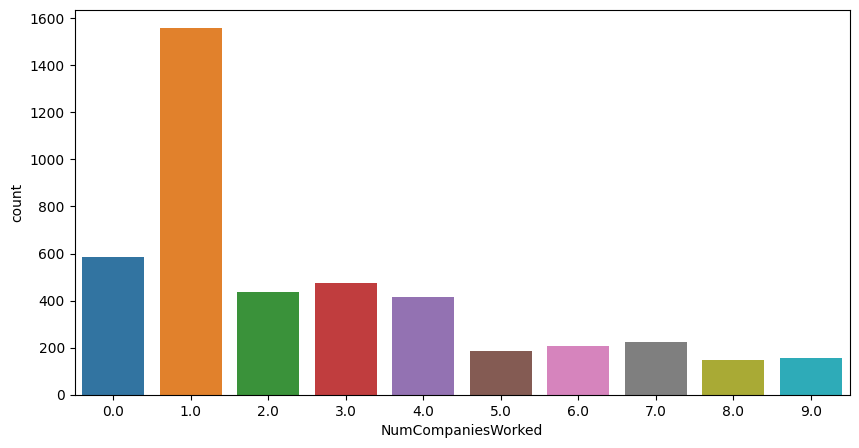

In [ ]:
#Let's see the distribution of each missing value columns
plt.figure(figsize=(10,5))
sns.countplot(x='NumCompaniesWorked', data=df)

In [ ]:
#now we will fill the missing values with the highest number of companies worked (MODE), that is 1
df['NumCompaniesWorked'].fillna(1.0, inplace=True)

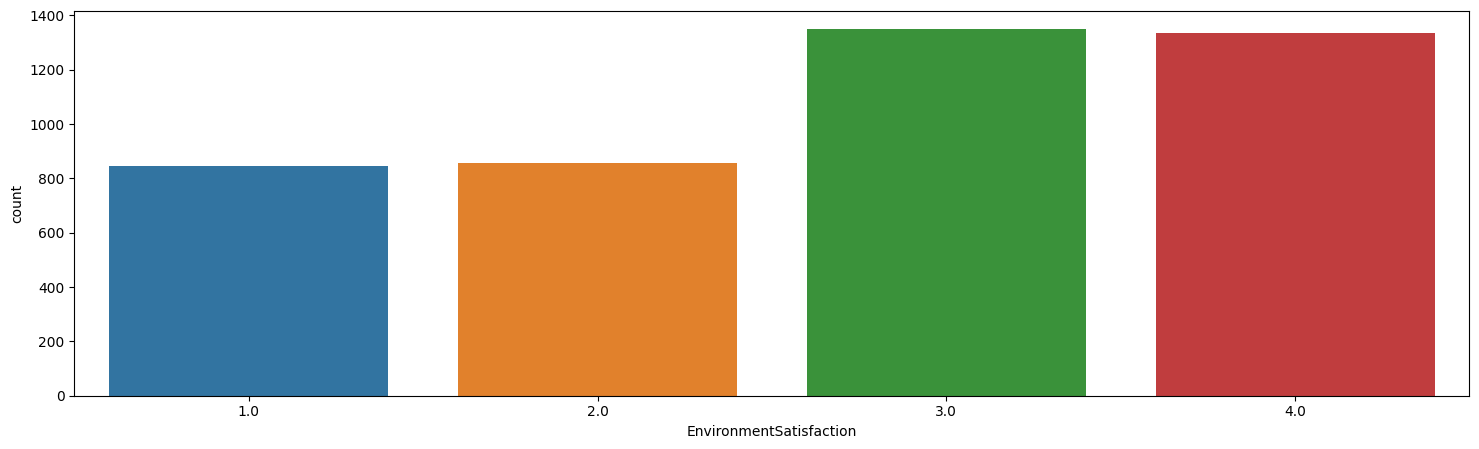

In [ ]:
plt.figure(figsize=(18,5))
ax=sns.countplot(x='EnvironmentSatisfaction',data=df)

In [ ]:
df['EnvironmentSatisfaction'].fillna(3.0,inplace=True)

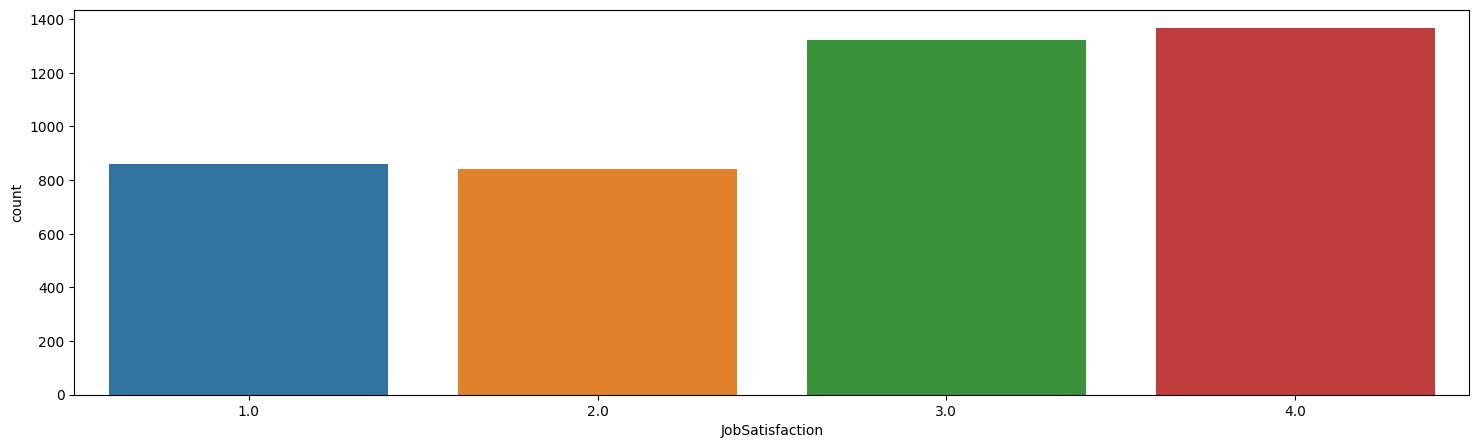

In [ ]:
plt.figure(figsize=(18,5))
ax=sns.countplot(x='JobSatisfaction',data=df)

In [ ]:
df.JobSatisfaction.median()

3.0

In [ ]:
df['JobSatisfaction'].fillna(3.0,inplace=True)

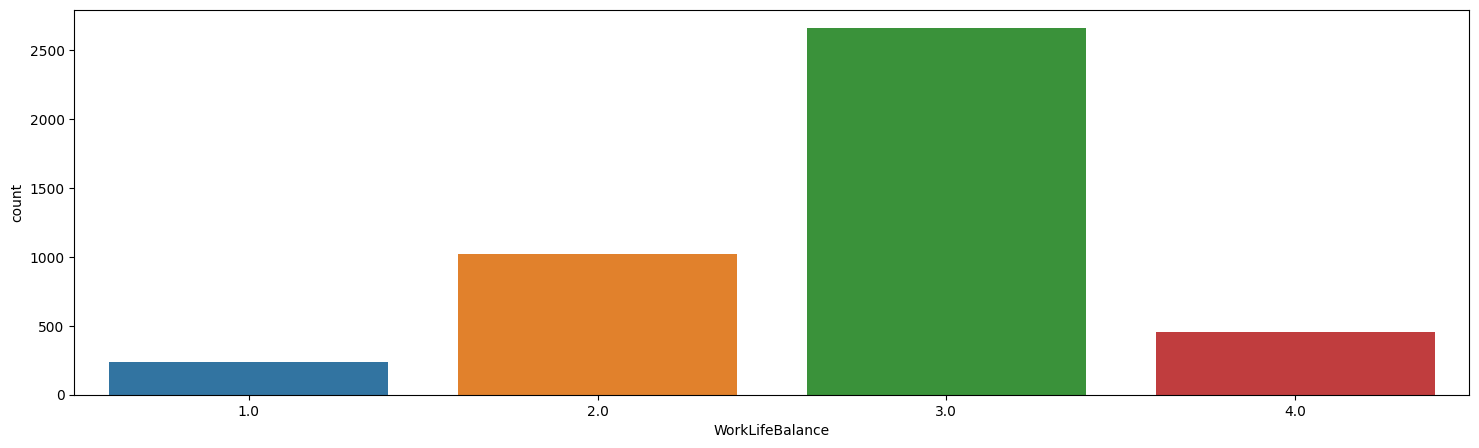

In [ ]:
plt.figure(figsize=(18,5))
ax=sns.countplot(x='WorkLifeBalance',data=df)

In [ ]:
df['WorkLifeBalance'].fillna(3.0,inplace=True)

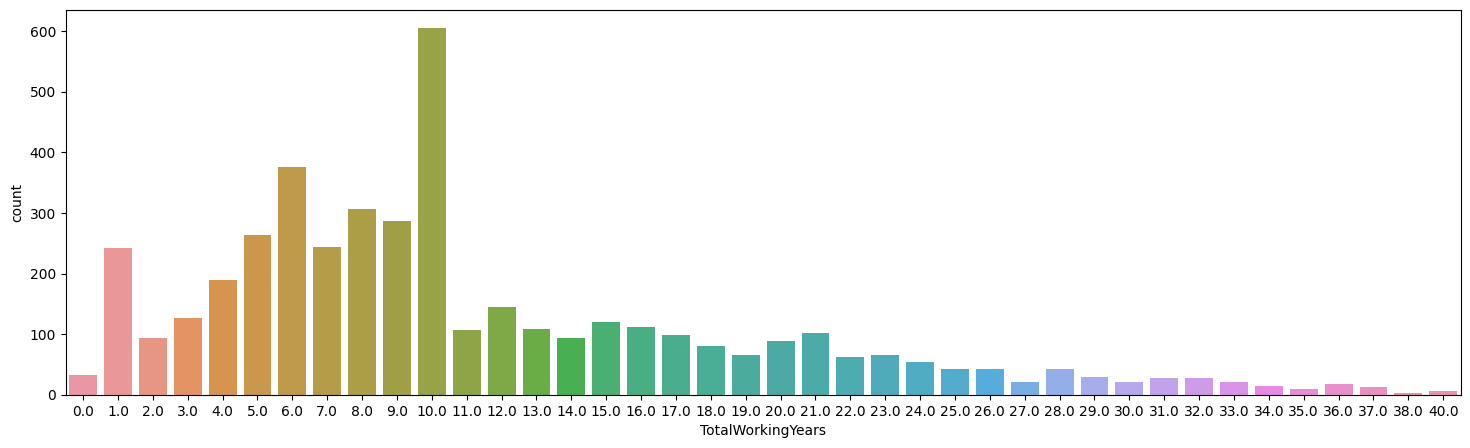

In [ ]:
plt.figure(figsize=(18,5))
ax=sns.countplot(x='TotalWorkingYears',data=df)

In [ ]:
df.TotalWorkingYears.median()

10.0

In [ ]:
df['TotalWorkingYears'].fillna(10.0,inplace=True)

In [ ]:
df.isnull().sum().sum()

0

##Exploratory Data Analysis

In [ ]:
df_eda = df.copy()

In [ ]:
####pandas.cut ---- it is used to segment and sort data values into bins.

In [ ]:
df_eda.Age = pd.cut(df.Age,range(10,70,10)) # create buckets of 10 years

In [ ]:
df_eda.Age

0       (50, 60]
1       (30, 40]
2       (30, 40]
3       (30, 40]
4       (30, 40]
          ...   
4405    (40, 50]
4406    (20, 30]
4407    (20, 30]
4408    (40, 50]
4409    (30, 40]
Name: Age, Length: 4410, dtype: category
Categories (5, interval[int64, right]): [(10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60]]

In [ ]:
def make_plot(feature_name):
    plt.figure(figsize=(18,10))

    ax = sns.countplot(x=feature_name,hue='Attrition',data=df_eda,palette='Set2')
    plt.xlabel(feature_name)
    plt.ylabel('Employee count')
    plt.title('{} vs Attrition'.format(feature_name))
    plt.legend()

#attrition is if a person will leave the company or not. It's a column in dataframe

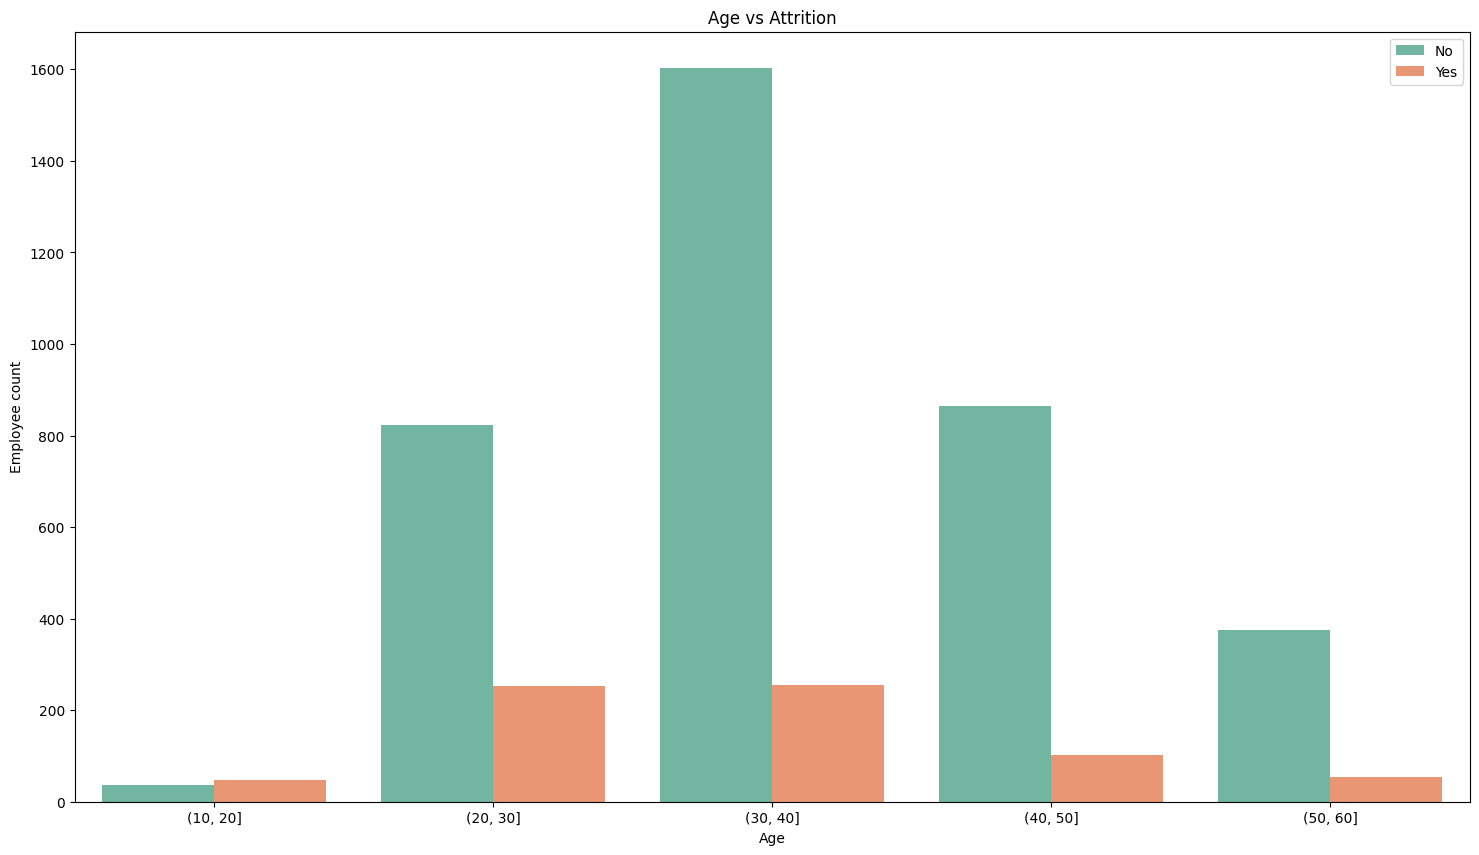

In [ ]:
make_plot('Age')

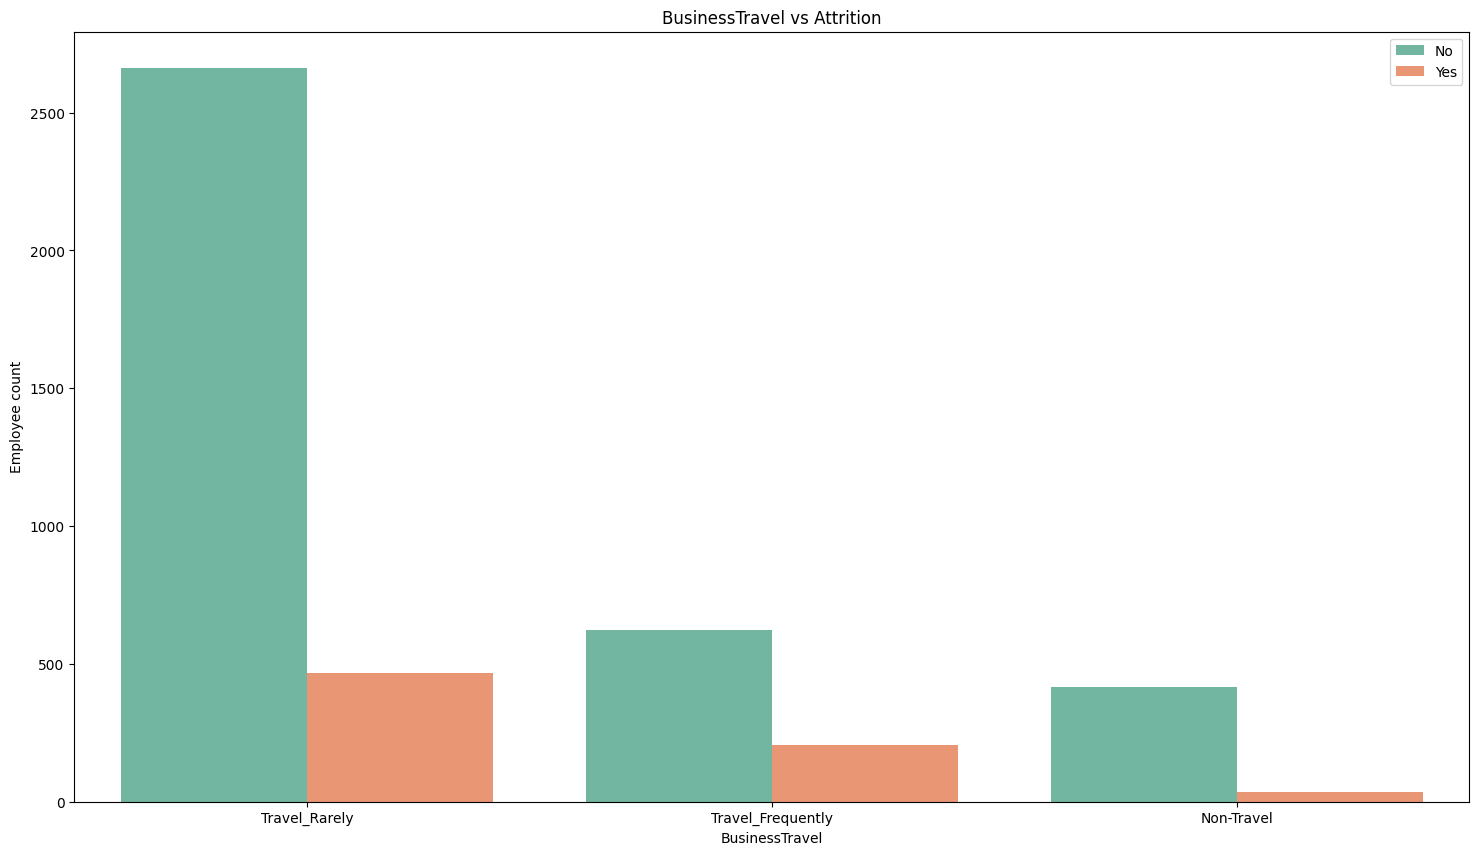

In [ ]:
make_plot('BusinessTravel')

We observe that there is a clear trend of employee who travels very frequently tend to have higher attrition compared to an employee who doesn't travel.

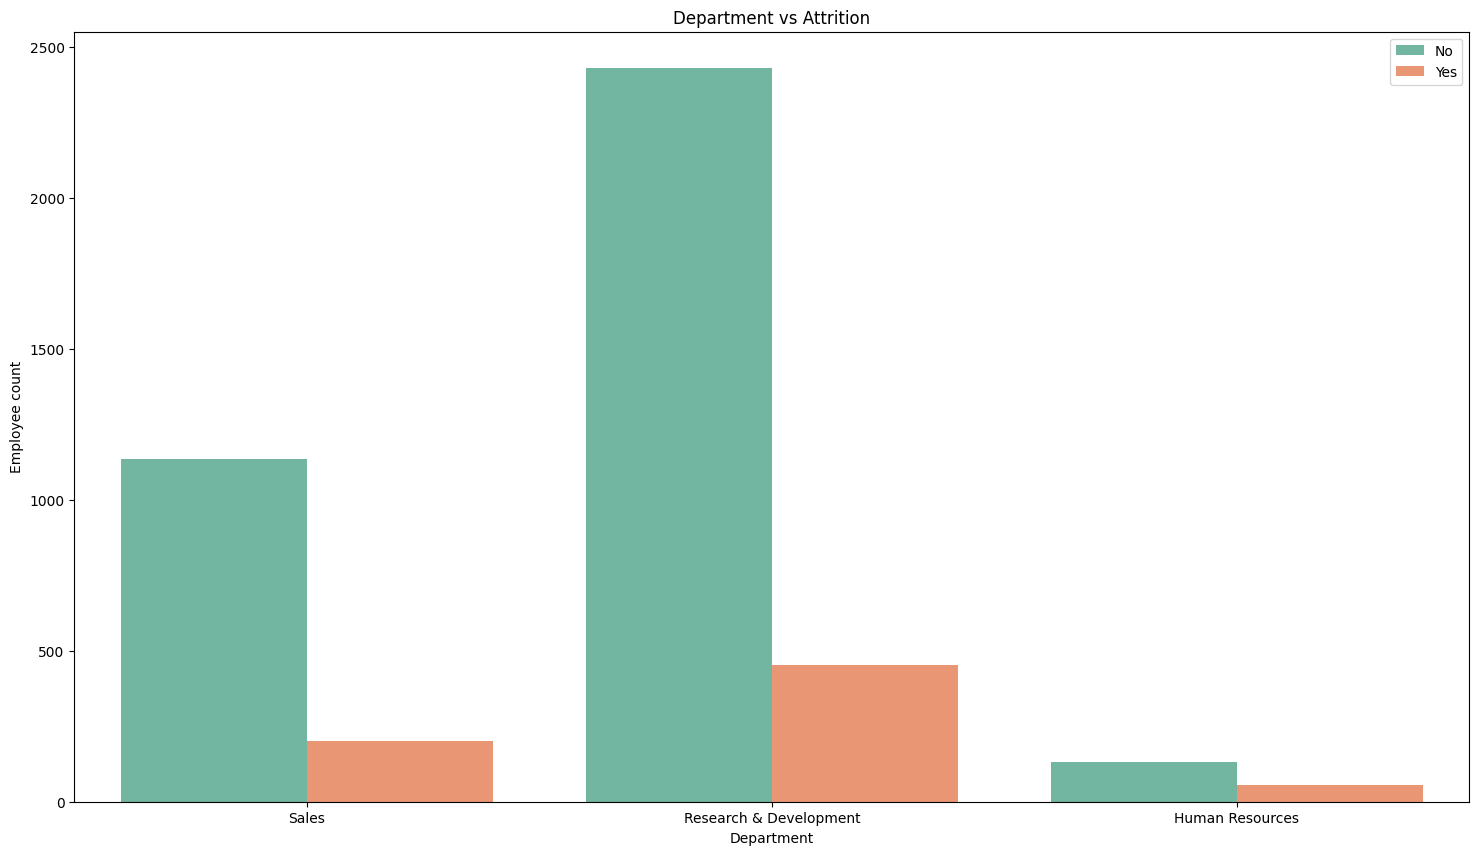

In [ ]:
make_plot('Department')

#Employees in HR department have much higher attrition compared to other departments

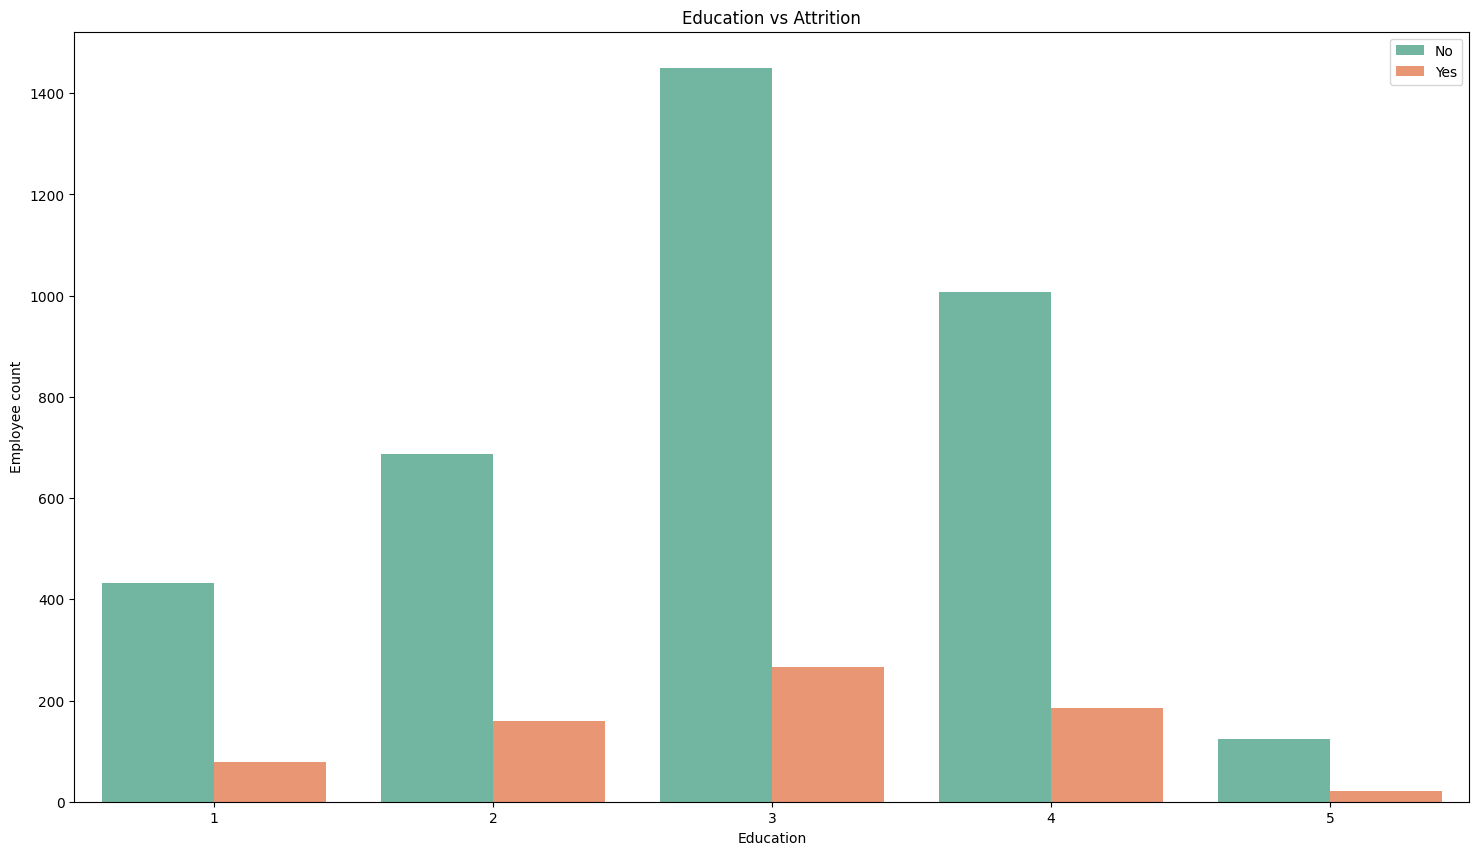

In [ ]:
make_plot('Education')


# Education level of employee does not appear to have significant effect on attrition.

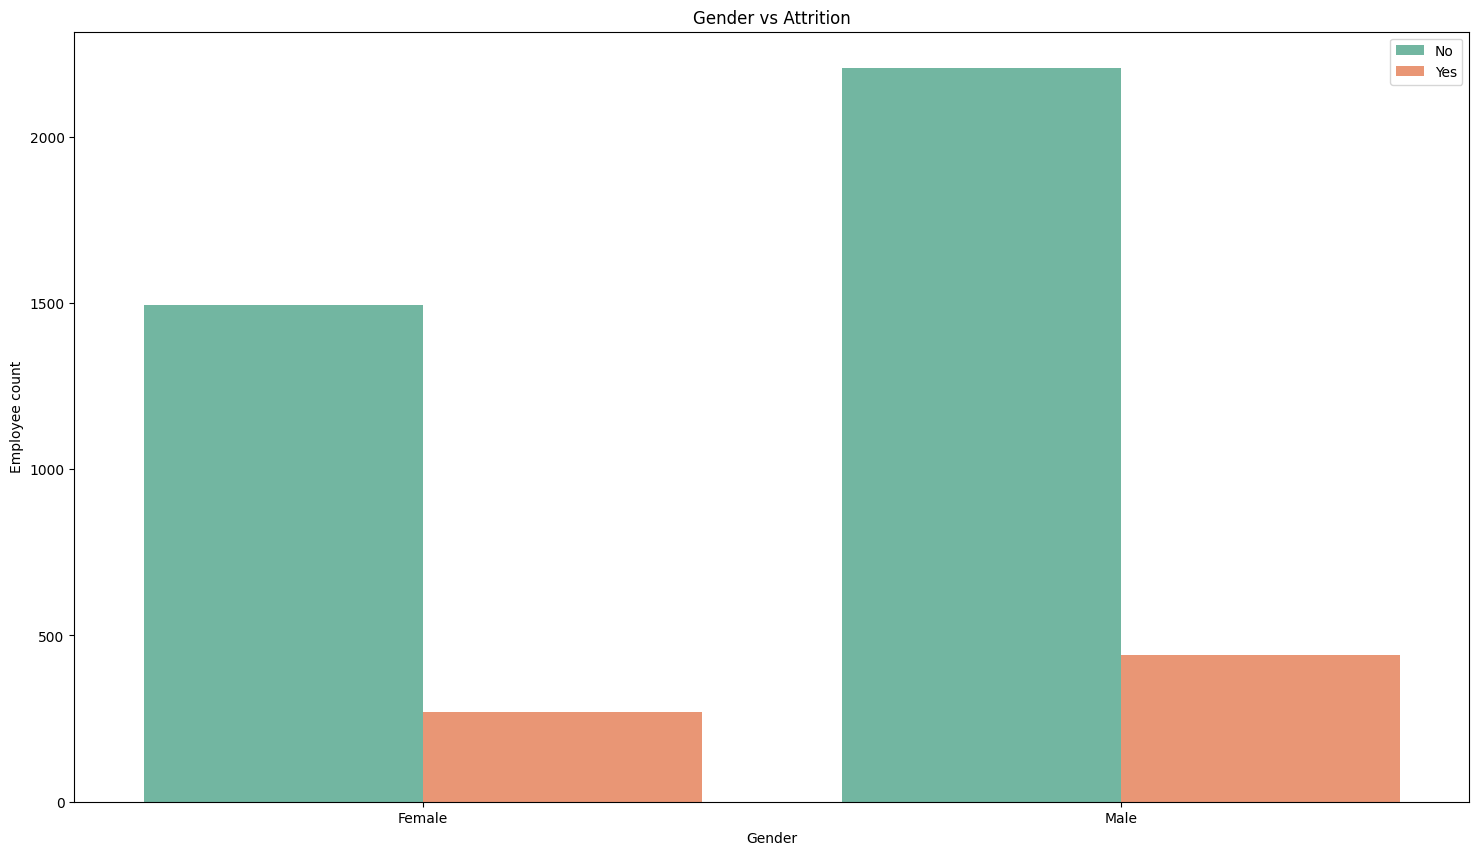

In [ ]:
make_plot('Gender')

# Gender does not appear to have significant impact on attrition.

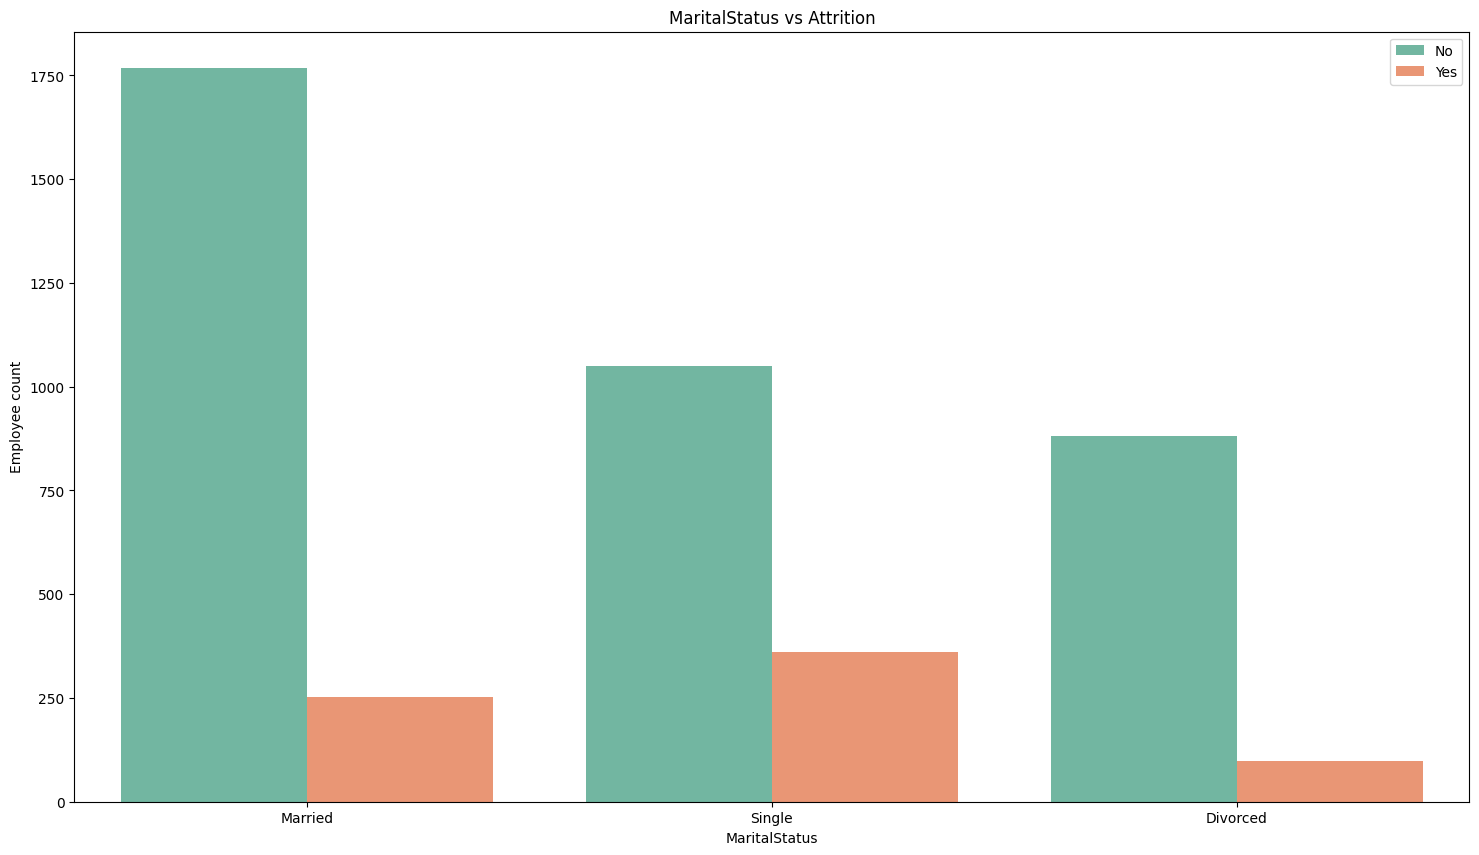

In [ ]:
make_plot('MaritalStatus')

# Singles are more tend to leave

In [ ]:
#Similarly other EDA can also be performed on the dataset with the below mentioned columns

In [ ]:
df_eda.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'mean_time'],
      dtype='object')

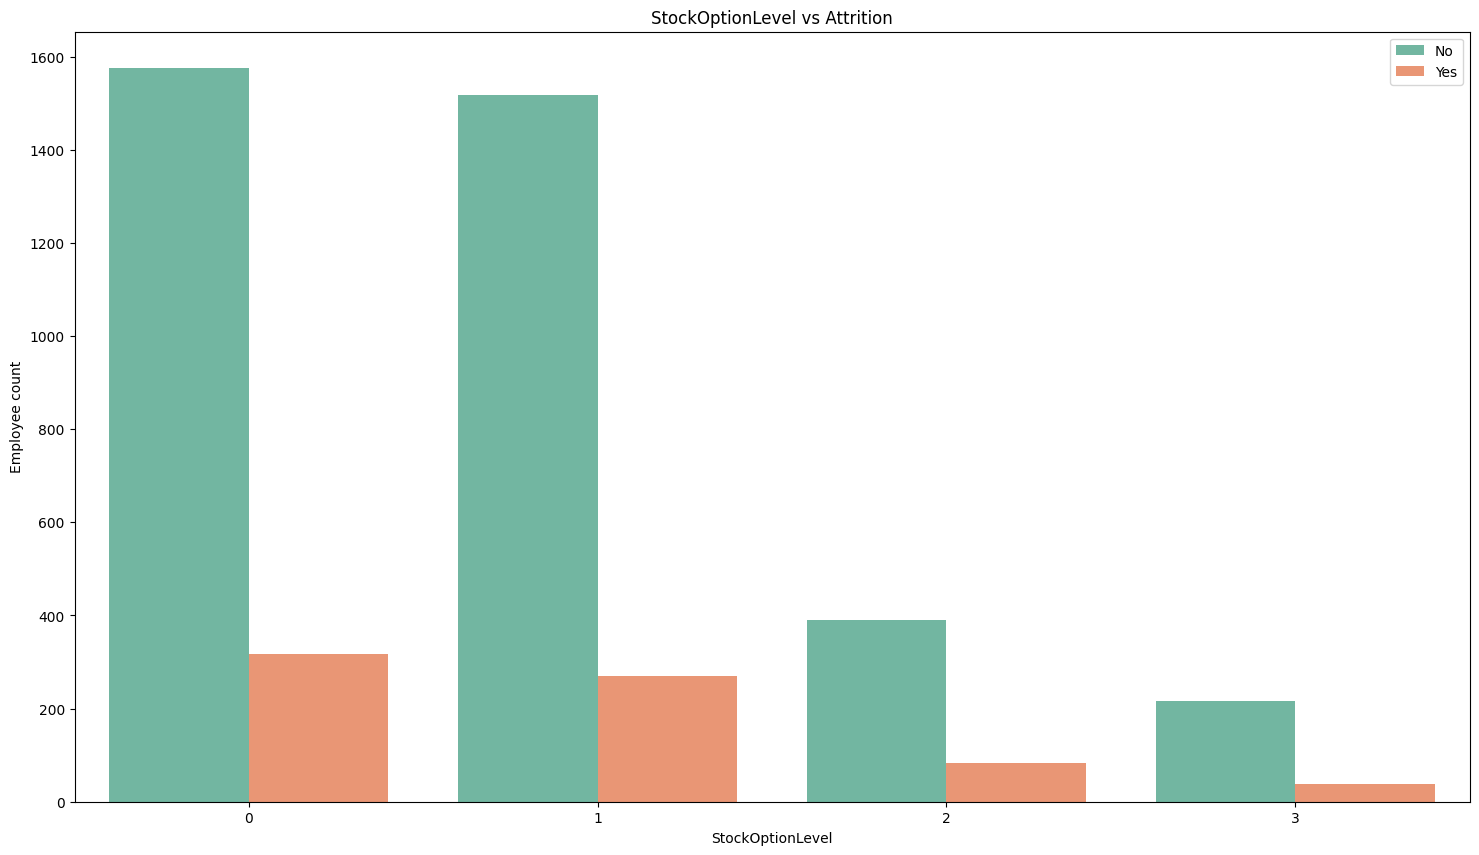

In [ ]:
make_plot('StockOptionLevel')

# Not much effect on attrition

##Feature Engineering

In [ ]:
#One hot encoding
df_eda.dtypes

Age                        category
Attrition                    object
BusinessTravel               object
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeID                    int64
Gender                       object
JobLevel                      int64
JobRole                      object
MaritalStatus                object
MonthlyIncome                 int64
NumCompaniesWorked          float64
PercentSalaryHike             int64
StockOptionLevel              int64
TotalWorkingYears           float64
TrainingTimesLastYear         int64
YearsAtCompany                int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
JobInvolvement                int64
PerformanceRating             int64
EnvironmentSatisfaction     float64
JobSatisfaction             float64
WorkLifeBalance             float64
mean_time                   float64
dtype: object

In [ ]:
#We will now perform one hot encoding for the columns with dtype as object

one_hot_var = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']

for i in one_hot_var:
  x_t = pd.get_dummies(df[i],prefix=i,prefix_sep='_',drop_first=True) #prefix is the name and we are seperating each of it by _ . Check output, you will understand
  df = df.join(x_t)
  df.drop(i,axis=1,inplace=True) #we are dropping the i th column (BusinessTravel column will be dropped and the categories of it will be kept) here and we will keep all the new columns.

In [ ]:
len(df.columns)

41

In [ ]:
# Now we will encode the remaining object columns: attrition and gender

df.Attrition = df.Attrition.apply(lambda x : 1 if x=='Yes' else 0)
df.Gender = df.Gender.apply(lambda x : 1 if x=='Male' else 0)

In [ ]:
x = df.drop('Attrition',axis=1)
y = df['Attrition']

##Checking for multicollinearity

Multicollinearity is the phenomenon when two or more columns have same number of correlation then those columns are gonna add no value but overfit the whole model. Hence it's better to avoid them.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
df_cor= x_train.copy()

In [ ]:
df_cor

,Age,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
324,40,10,4,325,1,2,65670,1.0,13,1,...,0,0,0,1,0,0,0,0,1,0
2404,49,2,4,2405,1,1,42270,4.0,18,0,...,0,1,0,0,0,0,0,0,0,0
4075,27,2,3,4076,0,1,39040,1.0,15,0,...,0,0,1,0,0,0,0,0,0,1
2098,30,9,3,2099,0,1,90710,0.0,19,1,...,0,0,0,0,0,1,0,0,1,0
2706,34,15,2,2707,0,2,84630,2.0,13,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,26,2,3,3445,1,2,48210,6.0,14,2,...,0,0,0,0,0,1,0,0,1,0
466,24,28,3,467,0,1,118490,1.0,16,1,...,0,0,0,0,0,0,0,0,0,0
3092,30,25,3,3093,1,1,24060,2.0,20,1,...,0,0,0,0,0,0,1,0,0,1
3772,29,1,3,3773,0,1,23140,3.0,13,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df_cor.corr()

,Age,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,0.019379,-0.036935,-0.008191,-0.030039,-0.013692,-0.033885,0.302870,-0.036950,-0.038801,...,-0.005565,0.032509,0.009582,0.013856,-0.005073,0.015164,-0.005517,-0.014821,0.071668,-0.106263
DistanceFromHome,0.019379,1.000000,-0.003452,-0.005935,-0.048440,-0.044052,-0.005759,-0.006831,0.030014,-0.001804,...,0.000300,0.048135,-0.044766,-0.006609,0.012147,-0.011590,-0.002225,0.012871,0.047110,-0.047282
Education,-0.036935,-0.003452,1.000000,-0.012751,-0.006601,0.049671,-0.003690,-0.017272,-0.047730,0.004690,...,0.053665,-0.096901,0.043441,-0.009276,0.056669,0.007524,0.003088,0.018983,-0.006663,0.026356
EmployeeID,-0.008191,-0.005935,-0.012751,1.000000,-0.014513,-0.007284,0.013822,-0.014740,-0.007156,-0.021854,...,-0.006125,-0.022919,0.008740,0.024953,0.002803,-0.006962,0.006049,0.006484,-0.012143,0.007367
Gender,-0.030039,-0.048440,-0.006601,-0.014513,1.000000,-0.023836,0.011740,-0.067699,0.010885,0.013619,...,0.012348,0.022775,-0.028885,0.000665,0.000420,0.019169,-0.016917,0.004247,-0.042599,0.020604
JobLevel,-0.013692,-0.044052,0.049671,-0.007284,-0.023836,1.000000,0.043841,-0.016480,0.026298,-0.000815,...,0.032391,-0.040952,0.016208,-0.016987,0.020486,0.031017,-0.019537,-0.019714,0.003991,-0.021058
MonthlyIncome,-0.033885,-0.005759,-0.003690,0.013822,0.011740,0.043841,1.000000,-0.017669,0.006573,0.014969,...,-0.026863,0.006367,-0.011250,0.018157,-0.001083,0.006996,0.008665,-0.001870,0.017155,-0.048162
NumCompaniesWorked,0.302870,-0.006831,-0.017272,-0.014740,-0.067699,-0.016480,-0.017669,1.000000,0.024969,0.020283,...,0.021262,0.002290,-0.016105,0.000280,0.011500,-0.005658,-0.006962,0.005597,-0.016904,-0.012751
PercentSalaryHike,-0.036950,0.030014,-0.047730,-0.007156,0.010885,0.026298,0.006573,0.024969,1.000000,0.002984,...,-0.030444,0.040204,0.003519,-0.007325,-0.008510,-0.004206,-0.048648,0.044385,-0.024419,0.020588
StockOptionLevel,-0.038801,-0.001804,0.004690,-0.021854,0.013619,-0.000815,0.014969,0.020283,0.002984,1.000000,...,-0.007299,-0.007277,-0.087471,0.041755,-0.036730,0.022060,0.062334,-0.041453,-0.033793,0.044371


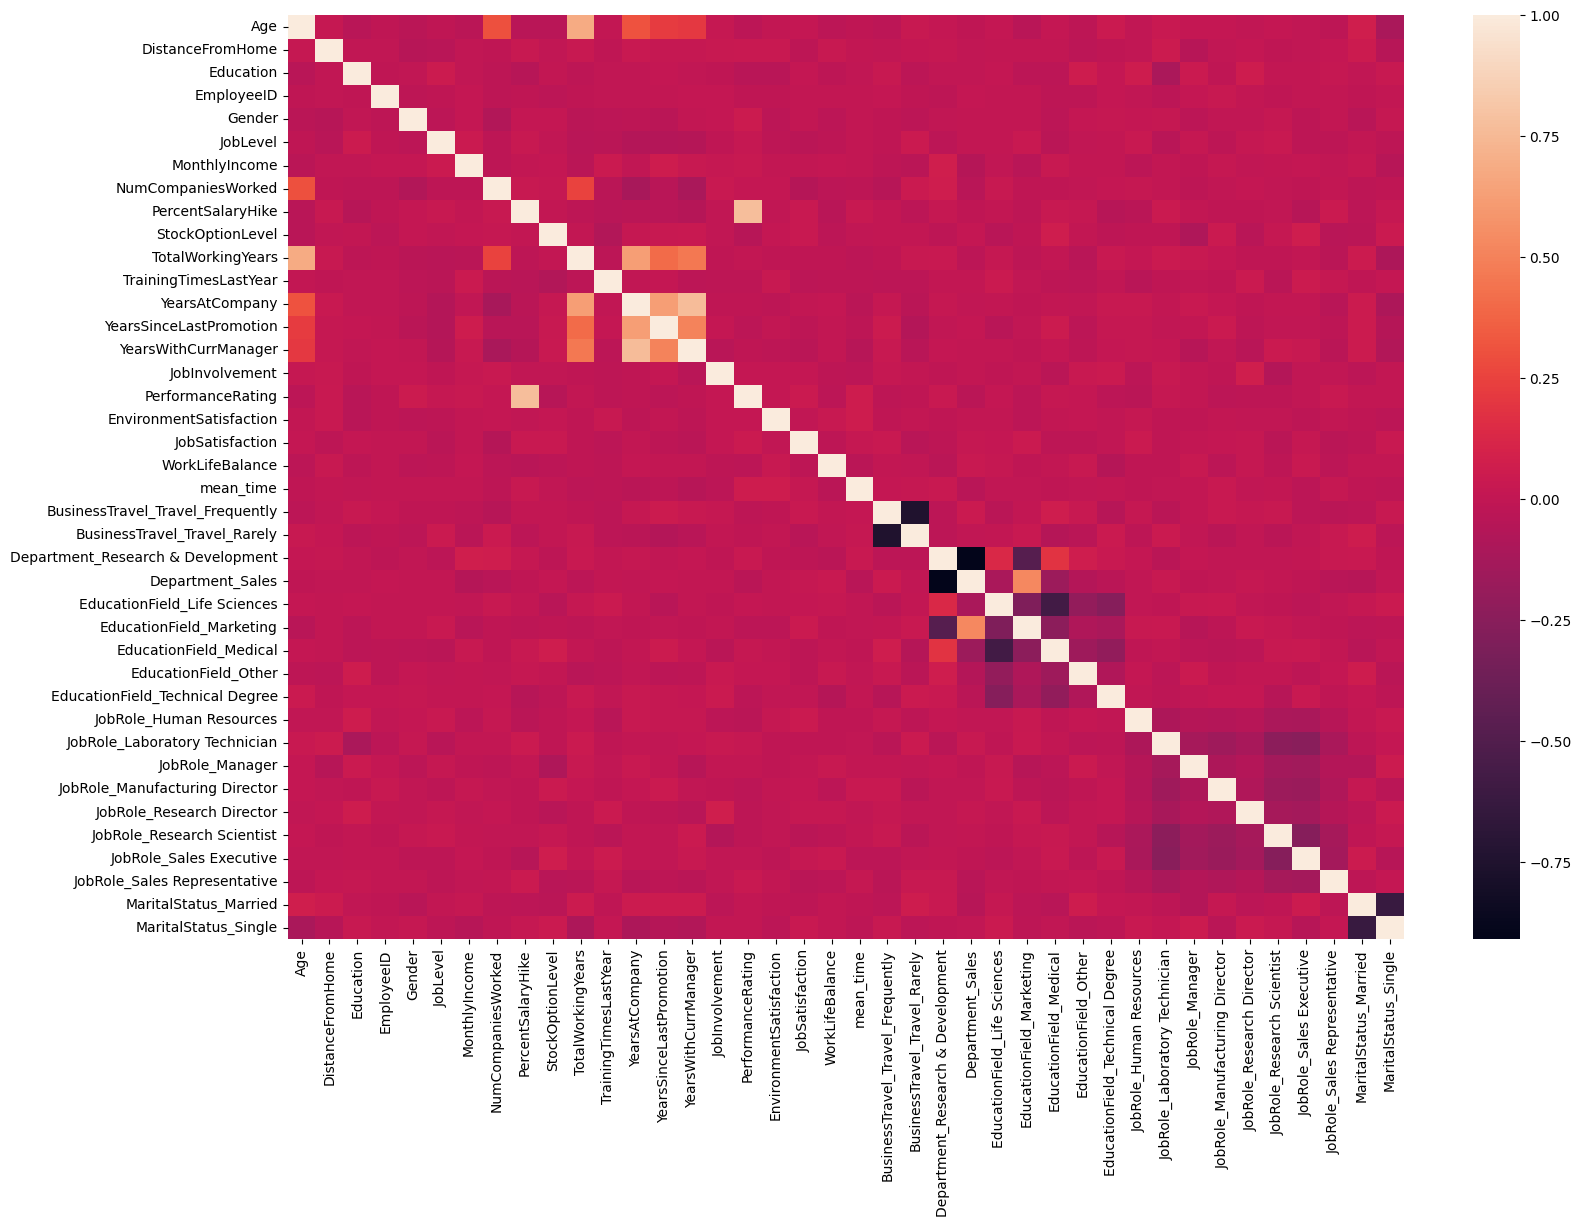

In [ ]:
#It's always better to use a heatmap, since it's easier to find correlation when there are higher number of columns
plt.figure(figsize=(18,12))
sns.heatmap(df_cor.corr())
plt.show()

In [ ]:
df_cor['Attrition'] = y_train #adding attrition to df_cor

In [ ]:
df_cor.corr()['Attrition'] #Displays the correlation of every feature with correlation.

Age                                 -0.170910
DistanceFromHome                    -0.015408
Education                           -0.011929
EmployeeID                          -0.003301
Gender                               0.015112
JobLevel                            -0.019593
MonthlyIncome                       -0.029938
NumCompaniesWorked                   0.035990
PercentSalaryHike                    0.020946
StockOptionLevel                    -0.005490
TotalWorkingYears                   -0.180036
TrainingTimesLastYear               -0.056925
YearsAtCompany                      -0.146951
YearsSinceLastPromotion             -0.041964
YearsWithCurrManager                -0.166100
JobInvolvement                       0.012523
PerformanceRating                    0.008122
EnvironmentSatisfaction             -0.110613
JobSatisfaction                     -0.126744
WorkLifeBalance                     -0.060033
mean_time                            0.198536
BusinessTravel_Travel_Frequently  

<Axes: >

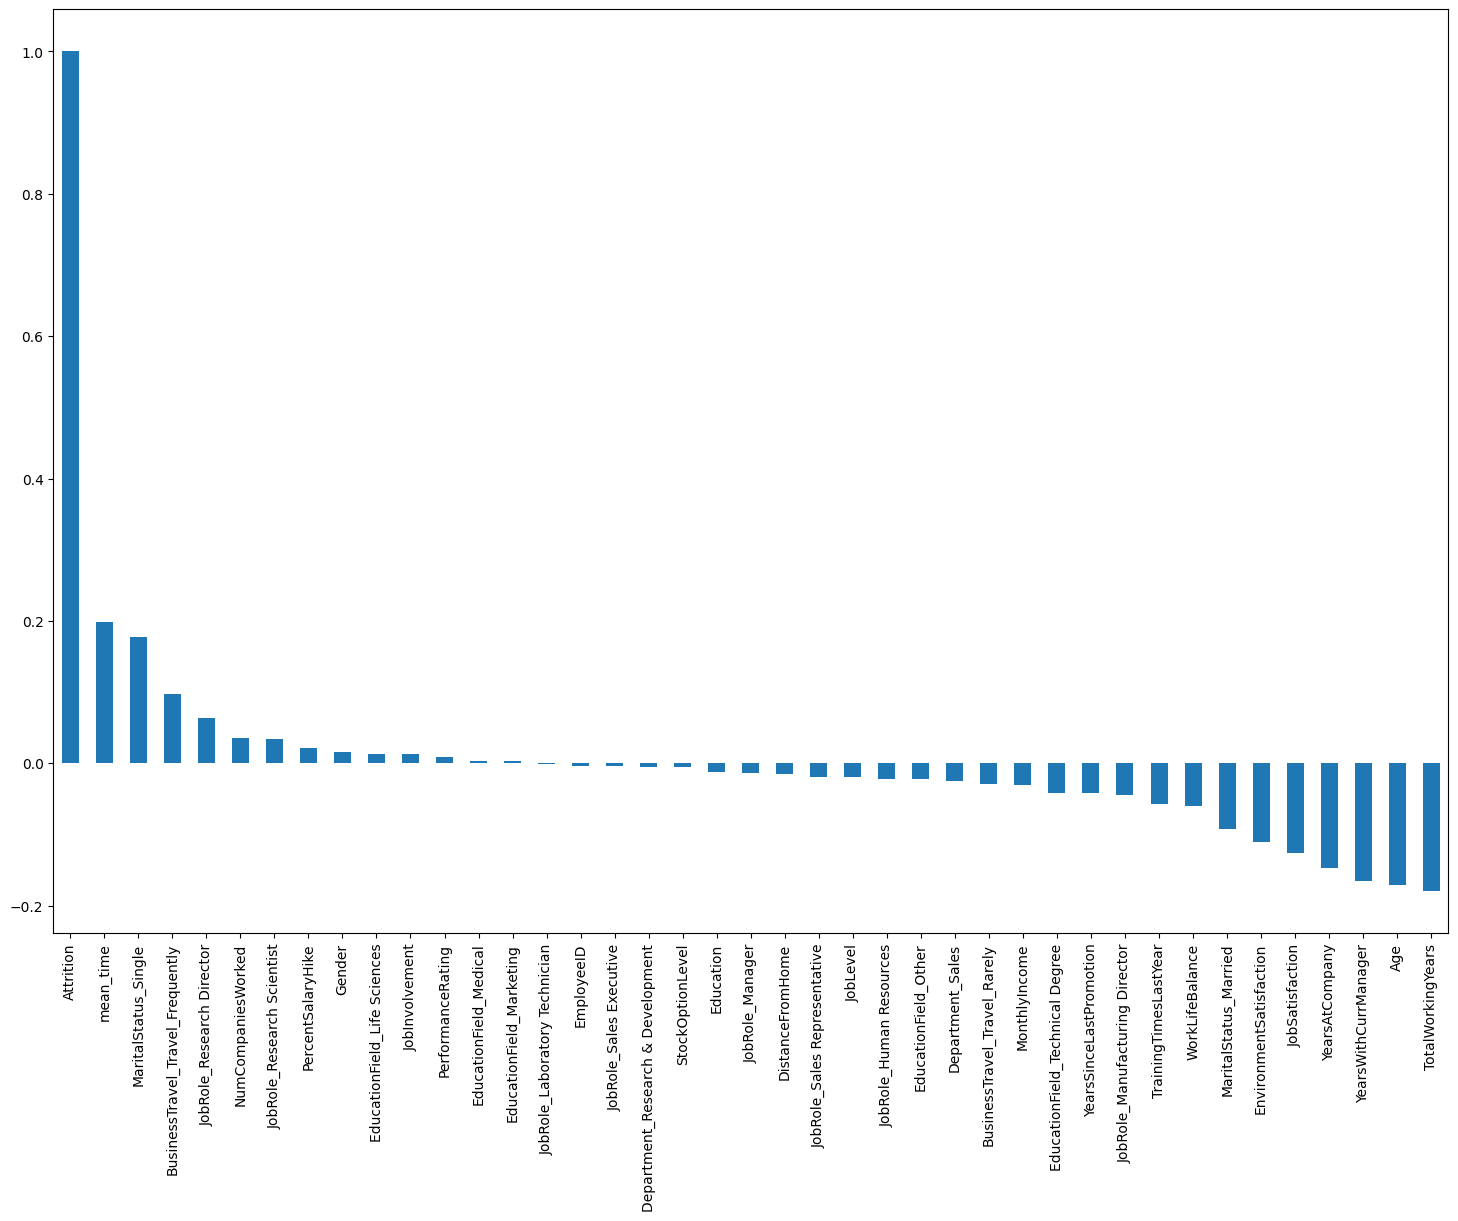

In [ ]:
plt.figure(figsize=(18,12))
df_cor.corr()['Attrition'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

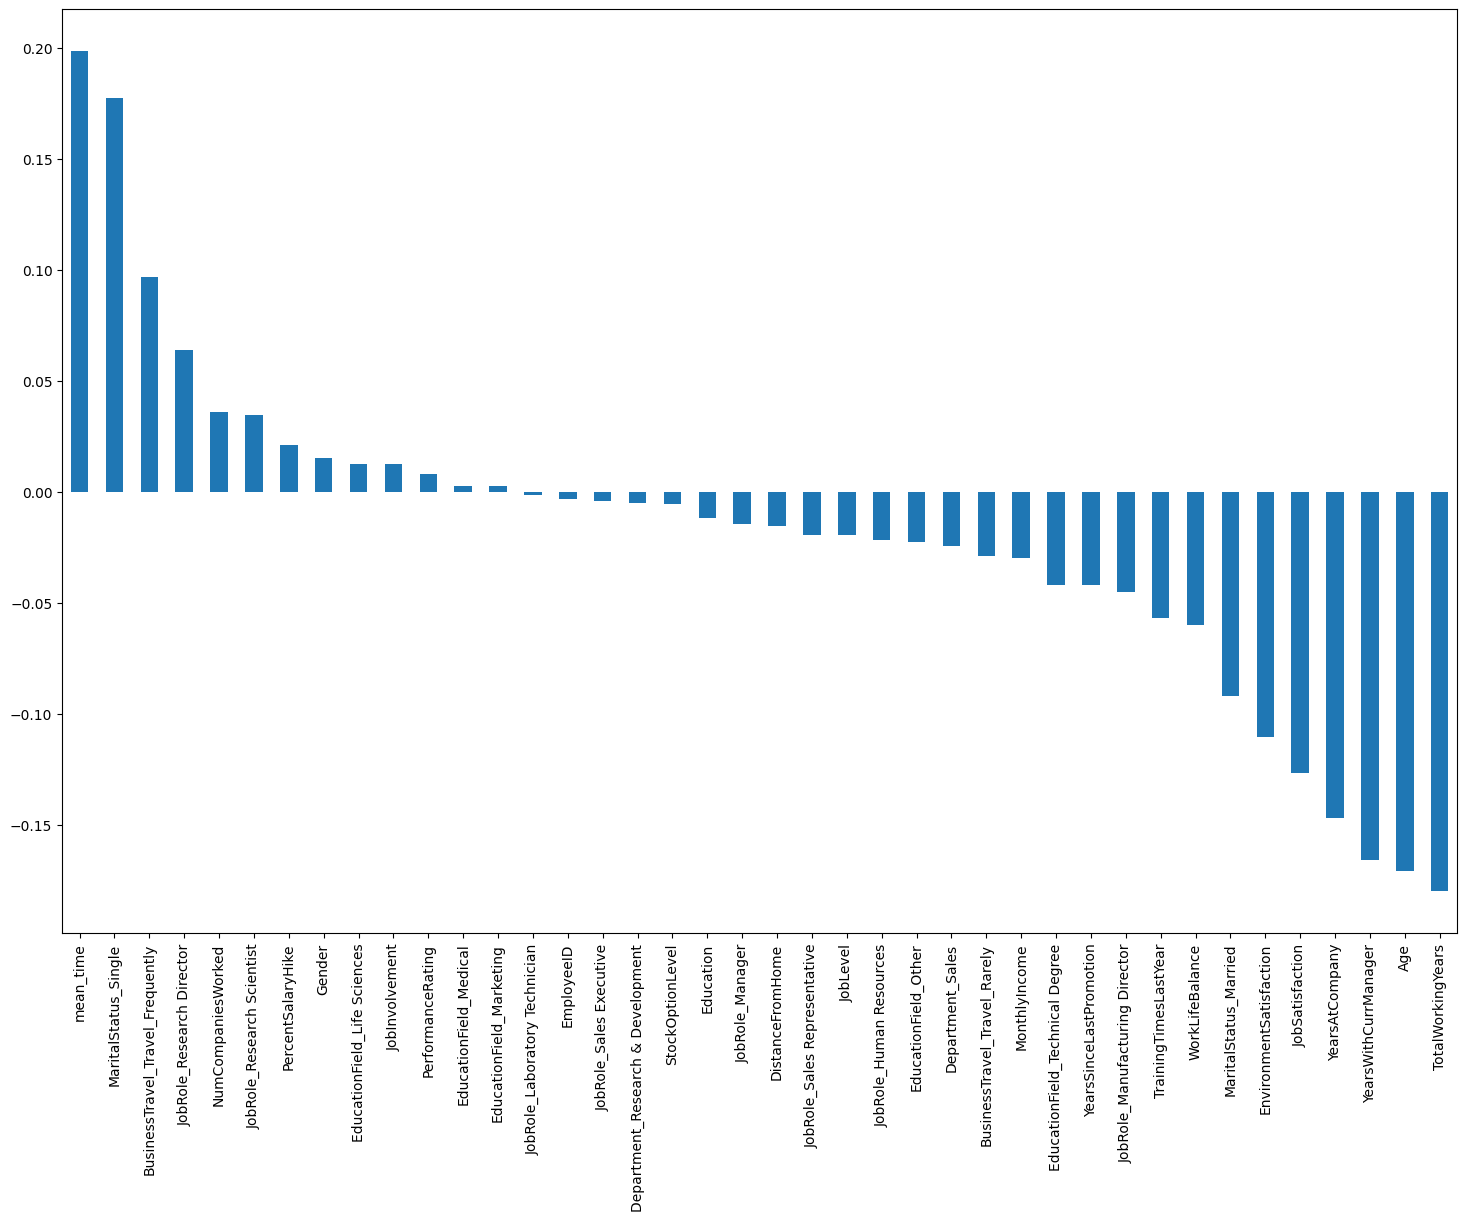

In [ ]:
plt.figure(figsize=(18,12))
df_cor.corr()['Attrition'].sort_values(ascending=False)[1:].plot(kind='bar') #removing attrition from the graph since it takes the 0th index and it's attrition is 1. correlation of attrition with attrition will be 1.

In [ ]:
# Let us check if there is high multi -collinearity between features
df_corr = df_cor.corr()

In [ ]:
df_corr

,Age,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Attrition
Age,1.000000,0.019379,-0.036935,-0.008191,-0.030039,-0.013692,-0.033885,0.302870,-0.036950,-0.038801,...,0.032509,0.009582,0.013856,-0.005073,0.015164,-0.005517,-0.014821,0.071668,-0.106263,-0.170910
DistanceFromHome,0.019379,1.000000,-0.003452,-0.005935,-0.048440,-0.044052,-0.005759,-0.006831,0.030014,-0.001804,...,0.048135,-0.044766,-0.006609,0.012147,-0.011590,-0.002225,0.012871,0.047110,-0.047282,-0.015408
Education,-0.036935,-0.003452,1.000000,-0.012751,-0.006601,0.049671,-0.003690,-0.017272,-0.047730,0.004690,...,-0.096901,0.043441,-0.009276,0.056669,0.007524,0.003088,0.018983,-0.006663,0.026356,-0.011929
EmployeeID,-0.008191,-0.005935,-0.012751,1.000000,-0.014513,-0.007284,0.013822,-0.014740,-0.007156,-0.021854,...,-0.022919,0.008740,0.024953,0.002803,-0.006962,0.006049,0.006484,-0.012143,0.007367,-0.003301
Gender,-0.030039,-0.048440,-0.006601,-0.014513,1.000000,-0.023836,0.011740,-0.067699,0.010885,0.013619,...,0.022775,-0.028885,0.000665,0.000420,0.019169,-0.016917,0.004247,-0.042599,0.020604,0.015112
JobLevel,-0.013692,-0.044052,0.049671,-0.007284,-0.023836,1.000000,0.043841,-0.016480,0.026298,-0.000815,...,-0.040952,0.016208,-0.016987,0.020486,0.031017,-0.019537,-0.019714,0.003991,-0.021058,-0.019593
MonthlyIncome,-0.033885,-0.005759,-0.003690,0.013822,0.011740,0.043841,1.000000,-0.017669,0.006573,0.014969,...,0.006367,-0.011250,0.018157,-0.001083,0.006996,0.008665,-0.001870,0.017155,-0.048162,-0.029938
NumCompaniesWorked,0.302870,-0.006831,-0.017272,-0.014740,-0.067699,-0.016480,-0.017669,1.000000,0.024969,0.020283,...,0.002290,-0.016105,0.000280,0.011500,-0.005658,-0.006962,0.005597,-0.016904,-0.012751,0.035990
PercentSalaryHike,-0.036950,0.030014,-0.047730,-0.007156,0.010885,0.026298,0.006573,0.024969,1.000000,0.002984,...,0.040204,0.003519,-0.007325,-0.008510,-0.004206,-0.048648,0.044385,-0.024419,0.020588,0.020946
StockOptionLevel,-0.038801,-0.001804,0.004690,-0.021854,0.013619,-0.000815,0.014969,0.020283,0.002984,1.000000,...,-0.007277,-0.087471,0.041755,-0.036730,0.022060,0.062334,-0.041453,-0.033793,0.044371,-0.005490


In [ ]:
df_corr.shape[0] #41 rows
df_corr.shape[1] #41 columns

41

In [ ]:
df_corr.iloc[1,0]

0.019379366979239934

In [ ]:
abs(df_corr.iloc[1,0]) #if values is negative it's changed to positive, basically like modulus function

In [ ]:
for i in range(df_corr.shape[0]):
  for j in range(df_corr.shape[1]):
    if((abs(df_corr.iloc[i,j])>0.8) & (abs(df_corr.iloc[i,j] )!=1)):
      print(round(df_corr.iloc[i,j],3), '&', df_corr.index[i]  ,df_corr.index[j])

-0.909 & Department_Research & Development Department_Sales
-0.909 & Department_Sales Department_Research & Development


In [ ]:
x_train.drop('Department_Sales',axis=1,inplace=True)
x_test.drop('Department_Sales',axis=1,inplace=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

m1= DecisionTreeClassifier()
m1.fit(x_train,y_train)

In [ ]:
df['Attrition'].value_counts()

0    3699
1     711
Name: Attrition, dtype: int64

In [ ]:
(a,b) = df['Attrition'].value_counts()

In [ ]:
c = a+b

In [ ]:
print("Percentage of No Attrition",(a/c)*100)
print("Percentage of Yes Attrition",(b/c)*100)


Percentage of No Attrition 83.87755102040816
Percentage of Yes Attrition 16.122448979591837


In [ ]:
#There is partiality in the dataset.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

m1= DecisionTreeClassifier()
m1.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix


In [ ]:
ypred = m1.predict(x_test)

In [ ]:
accuracy_score(y_test,ypred)

0.9691749773345422

In [ ]:
precision_score(y_test,ypred)

0.8850574712643678

In [ ]:
recall_score(y_test,ypred)

0.9166666666666666

In [ ]:
f1_score(y_test,ypred)

0.9005847953216374

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       935
           1       0.89      0.92      0.90       168

    accuracy                           0.97      1103
   macro avg       0.93      0.95      0.94      1103
weighted avg       0.97      0.97      0.97      1103

